#　参考
- https://github.com/wadayama/DU-Book/tree/main

In [1]:
import numpy as np
import jax

import matplotlib.pyplot as plt
import japanize_matplotlib
import math
import pandas as pd
from flax.training import train_state
import optax

In [2]:
delta = 0.05
beta = 20.0

In [3]:
def rbf(x, beta):
    return np.exp(-beta*x**2)

In [4]:
xs = np.linspace(-1,2.5,100)

In [5]:
N = 50
df = pd.DataFrame()
df["x"] = xs
sample_columns = []
for i in range(N):
    colum = "sample_{}".format(i)
    df[colum] = rbf(xs - delta*(i-1)+0.5, beta)
    sample_columns.append(colum)

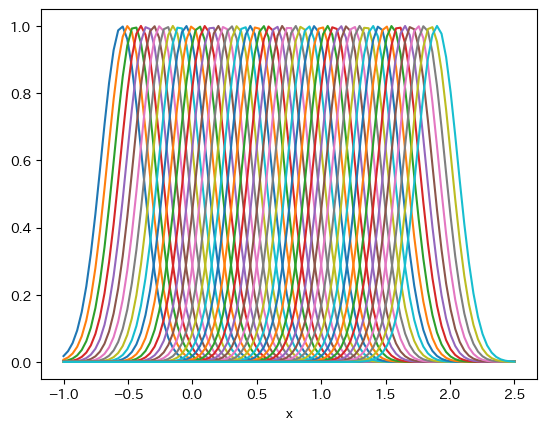

In [6]:
df.plot(x= "x", y = sample_columns, legend=False);

In [7]:
def rbf_func(x, theta):
    tmp_x = - delta * (np.arange(len(theta))) + x + 0.5
    rbfs = rbf(tmp_x, beta)
    return np.sum(theta * rbfs)

In [8]:
def Fit(T, N, theta):
    dx = T/N
    J = 0
    for i in range(N):
        u = rbf_func((i+1)*dx,  theta)
        # print(u)
        f = np.exp(-5*(i+1)*dx)*np.sin(5*(i+1)*dx)
        J += (u - f)**2
    return J

In [9]:
# ADAMの部分をSGDで代替

# @jax.jit
def train(T, N, theta, lr):
    new_theta = theta
    for i in range(train_itr):
        gs = jax.grad(Fit, argnums=2)(T, N, new_theta)
        new_theta = new_theta - lr * np.array(gs)
        # print(new_theta, gs)
        print(Fit(T, N, new_theta))
    return new_theta

In [10]:
N = 100
T = 1.0
theta_train = np.ones(50)
train_itr = 500

new_theta = train(T, N, theta_train, 0.003)

2294.0474354717126
870.9848799694017
338.9229950010057
138.5827007230877
62.34261824468641
32.73412381475327
20.741075829358294
15.461666321771395
12.787415534276365
11.16355072392476
9.99719763782288
9.05859527816339
8.255520359295504
7.548194266259383
6.917130121318472
6.350950554703384
5.841743145489707
5.383266515422318
4.970236709843665
4.5980247866498924
4.26251324245006
3.9600152803641855
3.687220504205956
3.4411529535900085
3.2191359780076176
3.018761653903629
2.8378636346101858
2.6744927572000035
2.5268953378881047
2.393493476721515
2.272867468938295
2.163739916183608
2.064961495359618
1.9754980637778554
1.8944191574107725
1.8208875705844845
1.754150012905939
1.6935286908548837
1.638413749180961
1.5882564352260637
1.5425630207506509
1.5008892300704106
1.4628353095506763
1.428041562527973
1.3961843286289568
1.3669723795554178
1.3401436497575625
1.3154623344088447
1.2927162406862638
1.2717144271502956
1.2522850737805165
1.2342735588530371
1.2175407414378925
1.201961408327023
1.1

In [11]:
df = pd.DataFrame()
xs = np.linspace(0,1,100)

init = []
trained = []
exact = []
dx = T/N
for x in xs:
    init.append(rbf_func(x, theta_train))
    trained.append(rbf_func(x, new_theta))
    exact.append(np.exp(-5*x)*np.sin(5*x))
df["x"] = xs
df["init_RBF"] = init
df["trained_RBF"] = trained
df["Exact"] = exact

<Axes: xlabel='x'>

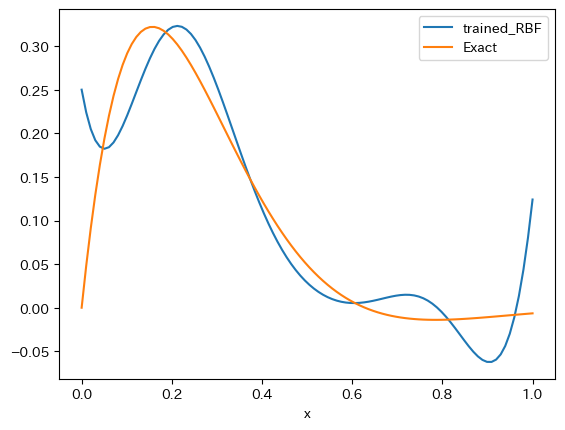

In [12]:
df.plot("x", ["trained_RBF", "Exact"])#, "init_RBF"])

<Axes: xlabel='x'>

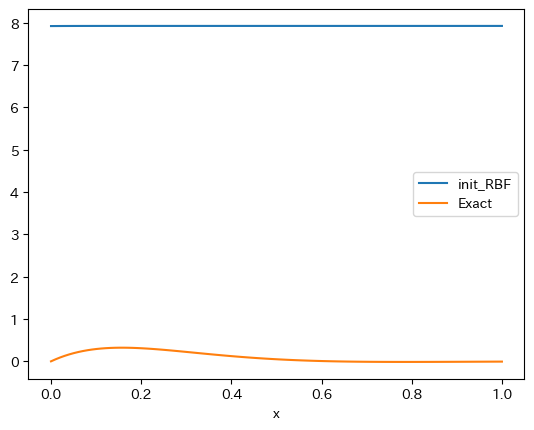

In [13]:
df.plot("x", ["init_RBF", "Exact"])
